<a href="https://colab.research.google.com/github/HorizonIITM/spec-analysis/blob/main/spec_analysis_prereqs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using a Google Colab

Google Colab is based on the stand-alone Jupyter Notebook system but is running on Google Drive. Google calls this the Google Colab Notebook. We write text, equations, and such but also run blocks of Python code all together or individually.

I personally find it janky and slow, so feel free to export this as a Jupyter Notebook (.ipynb) and enjoy life.

Go ahead and check if Colab is working by running the below code block.

In [ ]:
# This is a Python block

# Here is a variable.
message = 'Hello World!'

# This line of Python will print the message when you hit the play button.
print(message)

# Spectroscopy

<img src="https://openstax.org/resources/463dc6b891027044760b893bb856330b227362a5" width="640"/><br />Figure 1 - Visible light spectrum of the sun. (Fraknoi et al., 2017)

Light from objects in space can tell us a lot about the object. If we use that light to do spectroscopy, we can determine the temperature of the object, the nature and speed of its motion, and we can find out what its made of. We are exploring the chemical makeup of some stars in this project.

If you need some background on what a spectrum is and what it can do for astronomers, check out this [link](https://openstax.org/books/astronomy/pages/5-3-spectroscopy-in-astronomy).

## What is a spectrum?
This is the spectrum of a star. The y-axis represents the amount of light and the x-axis represents the wavelength of the particular feature. Spectroscopy can tell us about objects in space. For instance, using nothing more than the light from the star and some math, you can get a sense of the relative amount of a particular element in a star's atmosphere by looking at the absorption line. That is what we are doing today.

<img src="https://i0.wp.com/jimmynewland.com/astronomy/pastel/iraf-hd141531.png" width="640" /><br />Figure 2 - IRAF spectrum plot for star HD 141531 from summer 2019 observing run.


When one star has more of an element in its atmosphere than another, the absorption line or dips in in the light will be deeper because those atoms took some of the light leaving the star and absorbed it so those photons won't make it to us.

For our data, the units are a really strange. Flux is a unit of power which is energy per time unit. Here the our flux is relative which means 1.0 would be brightest part of the light from the star and the dips are where the light is less bright because it is being absorbed. Notice the brightness varies by wavelength. That is how we are able to look for the signature of particular elements. Specific elements absorb star light at only specific wavelengths. The dips are the fingerprints of the element.

## Coordinates

### 1- Retrieving the coordinates of the star gam Cas 

#### 1.1 - Using Astropy - Coordinates
Importing the Astropy library's coordinates management module
### **NOTE**: If you get an error here while importing packages even after installing, select the 'Runtime->Restart and run all' menu item and try again.


In [ ]:
#!pip install astropy
from astropy.coordinates import SkyCoord

A SkyCoords object represents an ICRS position (Right ascension [RA], Declination [Dec]) in the sky.

It is thus possible to retrieve the position of our target, by calling the **from_name** method which takes the name of the object as a parameter, and then displays its value.

In [ ]:
gam_cas_coords = SkyCoord.from_name("HD5394")
print(f"Object SkyCoords : {gam_cas_coords}")

Object SkyCoords : <SkyCoord (ICRS): (ra, dec) in deg
    (14.17721542, 60.71674028)>


From this variable, which is a SkyCoord object, it is possible to access the separate values for right ascension and declination. Depending on the methods used, different data formats and fineness are accessible.

In [ ]:
print(" - Position RA/DEC (hms & dms / ep=J2000): {gam_cas_coords.to_string('hmsdms')}")
print(" - Position RA et DEC (ep=J2000) : {gam_cas_coords.ra.hms, gam_cas_coords.dec.dms}")
print(" - RA (min) : {gam_cas_coords.ra.hms.m}")

 - Position RA/DEC (hms & dms / ep=J2000): 00h56m42.5317s +60d43m00.265s
 - Position RA et DEC (ep=J2000) : (hms_tuple(h=0.0, m=56.0, s=42.53170080000075), dms_tuple(d=60.0, m=43.0, s=0.26500800001201696))
 - RA (min) : 56.0


In the other direction, we can also create a SkyCoord object from the known coordinates and their format. 

In [ ]:
from astropy import units as u
c = SkyCoord(14.184, 60.7249, frame='icrs', unit='deg')
c = SkyCoord('00h56m44.16s', '+60d43m29.64s', frame='icrs')
c = SkyCoord('00 56 44.16 +60 43 29.64', unit=(u.hourangle, u.deg))
c  

<SkyCoord (ICRS): (ra, dec) in deg
    (14.184, 60.7249)>

#### 1.2 - Use of Astroquery and the SIMBAD module to retrieve the coordinates and spectral type of gam Cas

In addition, it is also possible to query the different catalogues with the Astroquery library, as in the example below with a query to SIMBAD, whether it is a sky object or an entire region (https://astroquery.readthedocs.io/en/latest/simbad/simbad.html). The list of catalogue modules is available here : https://astroquery.readthedocs.io/en/latest/

In addition, adding the "sptype" field to the VOTable query also makes it possible to retrieve the spectral type of the star. The list of possible criteria is available here: http://simbad.u-strasbg.fr/simbad/sim-fsam.

In [ ]:
#!pip install astroquery

#import module
from astroquery.simbad import Simbad

#get a simbad instance
simbad = Simbad()

#add spectral type parameters for VOTable request
simbad.add_votable_fields('sptype')

#request
result_table = simbad.query_object("gam cas")
result_table.pprint(show_unit=True)

#Coordinates
print("\nCoordinates")
print(result_table['RA'][0])
print(result_table['DEC'][0])

#Spectral Type
print("\nSpectral Type")
print(result_table['SP_TYPE'])

 MAIN_ID        RA           DEC      ... SP_TYPE  SP_QUAL      SP_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... -------- ------- -------------------
* gam Cas 00 56 42.5317 +60 43 00.265 ... B0.5IVpe       C 2011ARep...55...31S

Coordinates
00 56 42.5317
+60 43 00.265

Spectral Type
SP_TYPE 
--------
B0.5IVpe


## Source files and visualization of observation data

### 2 - Manipulating FITS files with Astropy

Official documentation and useful sources : 
- https://learn.astropy.org/FITS-images.html
- https://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials

#### 2.1 - FITS header and metadata

In [ ]:
import warnings #disable warnings for clear output
warnings.filterwarnings("ignore", category=UserWarning)

#Import Mathematics
import numpy as np

# Imports for Visualisation
# matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.rc = {}
%matplotlib notebook 

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style) # set astropy Graph style for plot
from astropy.io import fits # fits manipulation


## How/Where to store FITS files (or any files for that matter) in Google Colab:
This is something you should try finding out on your own. There are multiple ways to do it, and you can use the method of your choice. 

The dataset can be found here: https://github.com/HorizonIITM/spec-analysis

In [ ]:
# open image and show file info
image_path = 'dataset/gamcas_siril_astrometry.fit'
hdu_list = fits.open(image_path)
hdu_list.info()

NameError: ignored

Once the FITS file is loaded into memory, it is possible to read the raw data, as well as the header to view the metadata.

In [ ]:
hdu = hdu_list[0]
image_data = hdu_list[0].data
image_header = hdu_list[0].header

print(f'Image Data Type : {type(image_data)} - Shape : {image_data.shape}')
print('------------------------------ Header ------------------------------')
print(repr(image_header))
print('---------------------------- End Header ----------------------------')

Image Data Type : <class 'numpy.ndarray'> - Shape : (3672, 5496)
------------------------------ Header ------------------------------
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 5496 / length of data axis 1                          
NAXIS2  =                 3672 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MIPS-FHI=                   1. / Upper visualization cutoff                     
MIPS-FLO=                   0. / Lower visualization cutoff                     
BZERO   =                   0. / offset data range to th

#### 2.2 - Viewing the image with MatplotLib

With different types of visualization according to the parameters when calling the imshow() method.

<IPython.core.display.Javascript object>


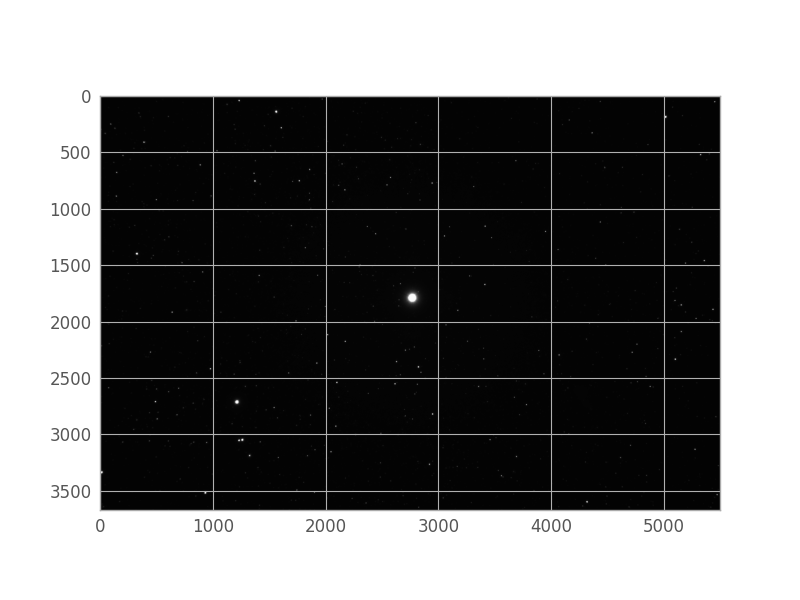

In [ ]:
#Init figure
f1 = plt.figure()
f1.add_subplot()

#Show raw image - Parameters dataset-image & colorMap
plt.imshow(image_data, cmap='gray')
plt.show()


<b>Characteristics of the image</b>

To display information about the shooting characteristics, the numpy library can be associated with the numpy library. This allows the statistical values (min, max, avg, standard deviation) to be displayed in addition to the histogram of the image.

Please note that this is a 32 bit floating point image. (float). The values will of course be different when working with a 16 bit image (int).

In [ ]:
print('----- Statistics values -----')
print('Min :', np.min(image_data))
print('Max :', np.max(image_data))
print('Mean :', np.mean(image_data))
print('Stdev :', np.std(image_data))
print('Data Type :', image_data.dtype) #i.e. <f4 = little-endian single-precision floating point 32 bit 
#(More detail about stype at https://numpy.org/doc/stable/reference/arrays.dtypes.html)
print('Image length : ', len(image_data)) # size list
print('Shape :', image_data.shape) # dimensions of the array

----- Statistics values -----
Min : 0.0
Max : 1.0
Mean : 0.0162365
Stdev : 0.023749666
Data Type : >f4
Image length :  3672
Shape : (3672, 5496)


<IPython.core.display.Javascript object>


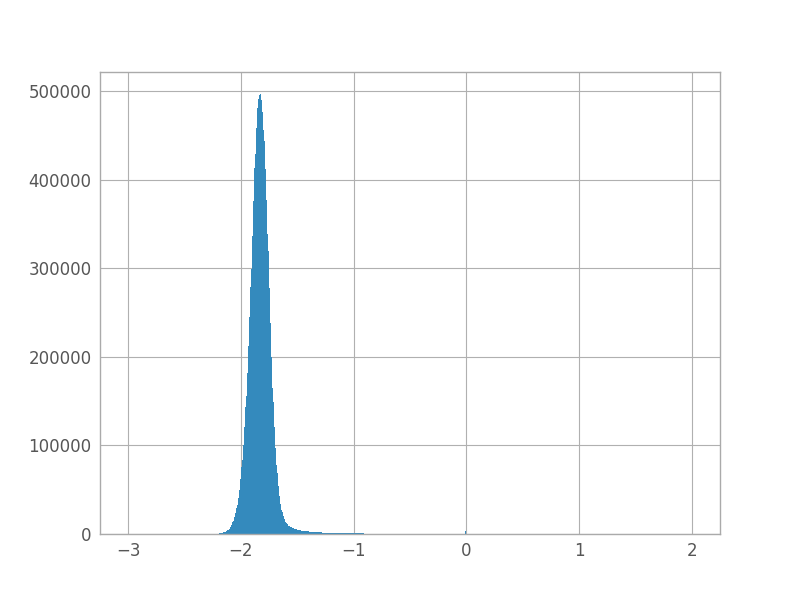

In [ ]:
np.seterr(divide='ignore') #suppress the warnings raised by taking log10 of data with zeros

#New figure
f2 = plt.figure()

#Prepare Histogram
#Because image is a 2D Tab, need to convert in 1-D for plotting
#Use flatten () method on an array return 1-D numpy tab.
plt.hist(np.log10(image_data.flatten()), range=(-3, 2), bins=1000);

#Show Histogram
plt.show()

We will thus be able to modify the display of our image according to the areas of the histogram that interest us most (i.e. -0.2 / 0.2), because their visualization is facilitated.

<IPython.core.display.Javascript object>


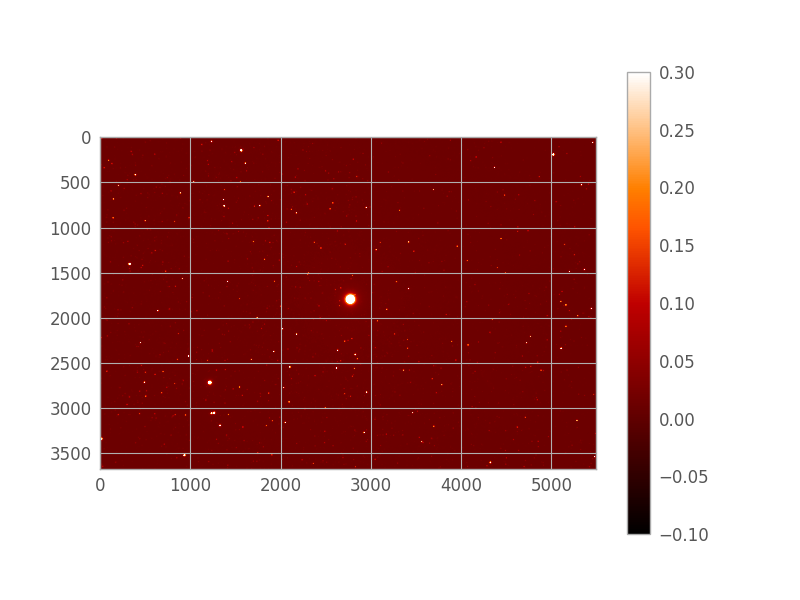

In [ ]:
f3 = plt.figure()
img = plt.imshow(image_data)
img.set_clim(-0.1,0.3)
plt.colorbar()

But also use different types of colouring (cmap) and a logarithmic scale with numpy ( np.log(dataset-image) ).

<IPython.core.display.Javascript object>


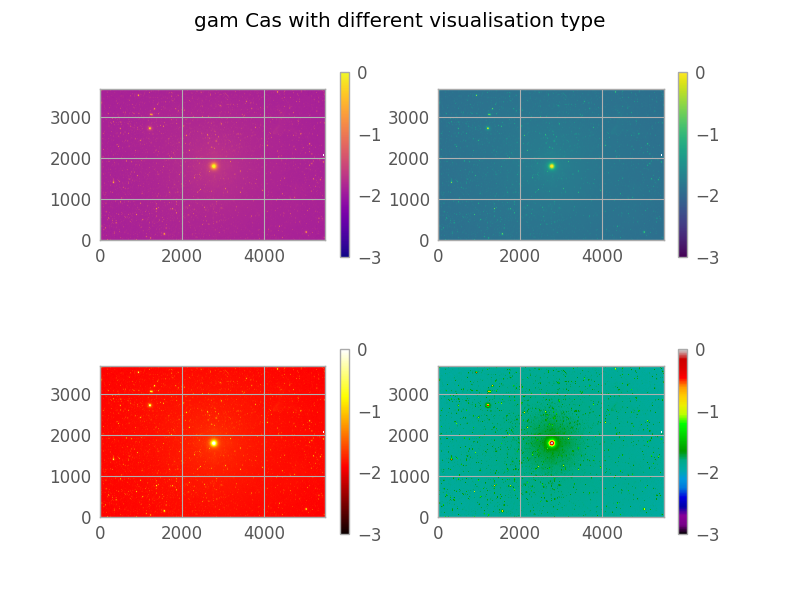

In [ ]:
#hide warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from matplotlib.colors import LogNorm

f4 = plt.figure()
f4.suptitle('gam Cas with different visualisation type')

f4.add_subplot(2,2, 1)
plt.imshow(np.log10(image_data), cmap='plasma', vmin=-3, vmax=0, origin='lower')
plt.colorbar()

f4.add_subplot(2,2, 2)
plt.imshow(np.log10(image_data), cmap='viridis', vmin=-3, vmax=0, origin='lower')
plt.colorbar()

f4.add_subplot(2,2,3)
plt.imshow(np.log10(image_data), cmap='hot', vmin=-3, vmax=0, origin='lower')
plt.colorbar()

f4.add_subplot(2,2, 4)
plt.imshow(np.log10(image_data), cmap='nipy_spectral',  vmin=-3, vmax=0, origin='lower')
plt.colorbar()

plt.show(block=True)

#More params at https://matplotlib.org/3.1.1/tutorials/colors/colormapnorms.html

<b>Converting the FITS image to JPEG</b>

As the initial image is 80 MB, it is possible to convert this FITS image to jpeg/png, before using the astrometry service, in order to have a lighter image of about 100kb and speed up the process.

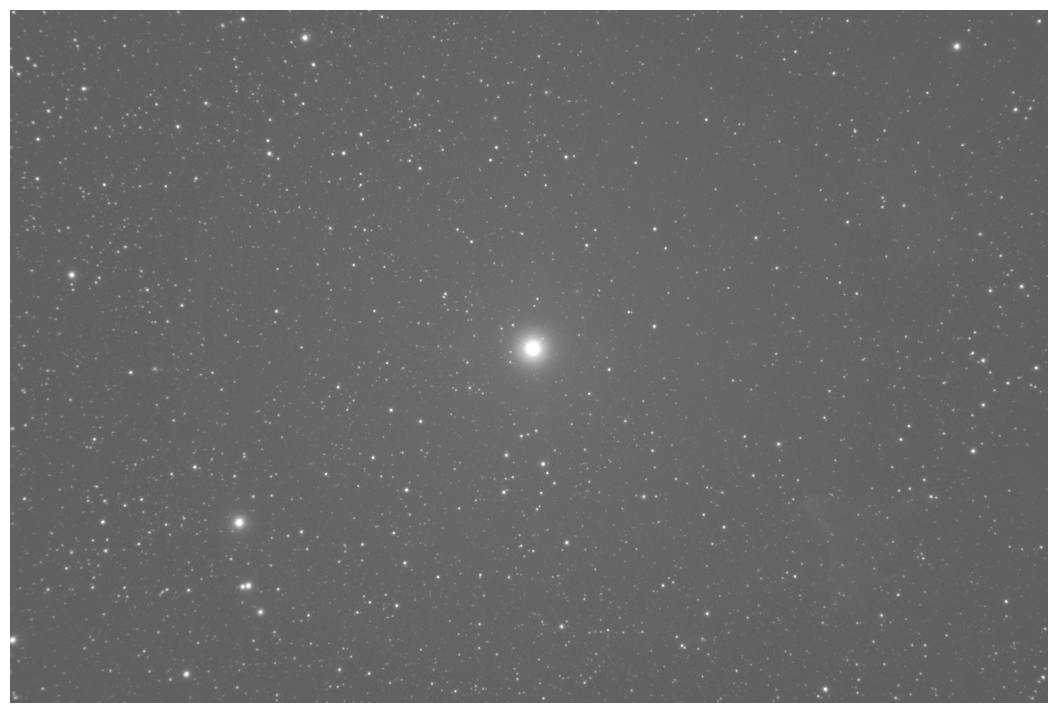

In [ ]:
#image name (FITS) to convert : image_path
#image name convert in jpeg/png : gamcas_jpeg.jpeg
from matplotlib.colors import LogNorm
%matplotlib inline
fig6 = plt.figure(figsize=(16, 9))
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.grid()
plt.axis('off')
plt.savefig("dataset/gamcas_jpeg.jpeg", bbox_inches='tight')

<b>Retrieving and displaying coordinates without going through the API in line of code</b>

### 3 - Display and manipulation of spectra processed with SpecUtils

#### 3.1 - Visualisation of the 2D Spectrum

From the elements used previously, it is therefore possible to display the acquired raw spectrum and check that it is not saturated.

Filename: dataset/Navi_Light_007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (2749, 2199)   int16 (rescales to uint16)   
Image Data Type : <class 'numpy.ndarray'> - Shape : (2199, 2749)
------------------------------ Header ------------------------------
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2749                                                  
NAXIS2  =                 2199                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'Atik 460ex'         

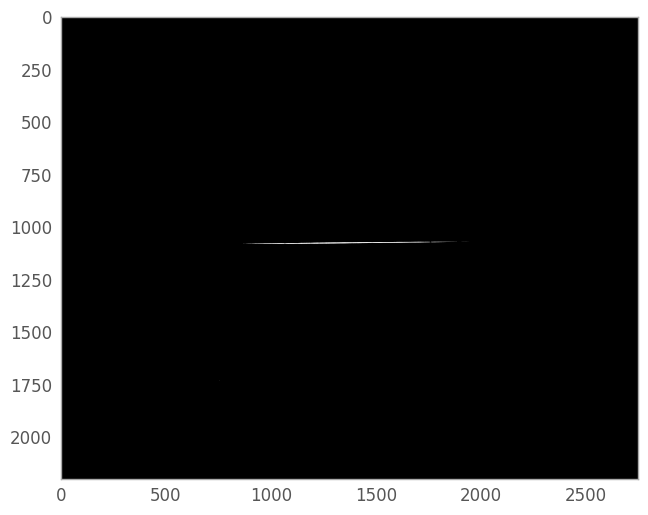

In [ ]:
#open image and show file info
spec1D_path = 'dataset/Navi_Light_007.fits'
hdu_list_spec1D = fits.open(spec1D_path)
hdu_list_spec1D.info()

spec1D_data = hdu_list_spec1D[0].data
spec1D_header = hdu_list_spec1D[0].header

print(f'Image Data Type : {type(spec1D_data)} - Shape : {spec1D_data.shape}')
print('------------------------------ Header ------------------------------')
print(repr(spec1D_header))
print('---------------------------- End Header ----------------------------')

fig9 = plt.figure()
plt.imshow(spec1D_data, cmap='gray',norm=LogNorm(), vmin=1800,vmax = 4500)
plt.grid(False)

print('Statistics values')
print('Min:', np.min(spec1D_data))
print('Max:', np.max(spec1D_data))
print('Mean:', np.mean(spec1D_data))
print('Stdev:', np.std(spec1D_data))

Note that the reduction part of the 2D to 1D spectrum is not mentioned here. It is considered that this processing is carried out with current software  (i.e. ISIS, Demetra, VSpec, SpcAudace, etc.).
- ISIS : http://www.astrosurf.com/buil/isis-software.html
- Demetra : https://www.shelyak.com/logiciel-demetra/
- VSpec : http://astrosurf.com/vdesnoux/
- SpcAudace : http://spcaudace.free.fr/

#### 3.2 - 1D Spectrum Visualisation with SpecUtils and Matplotlib

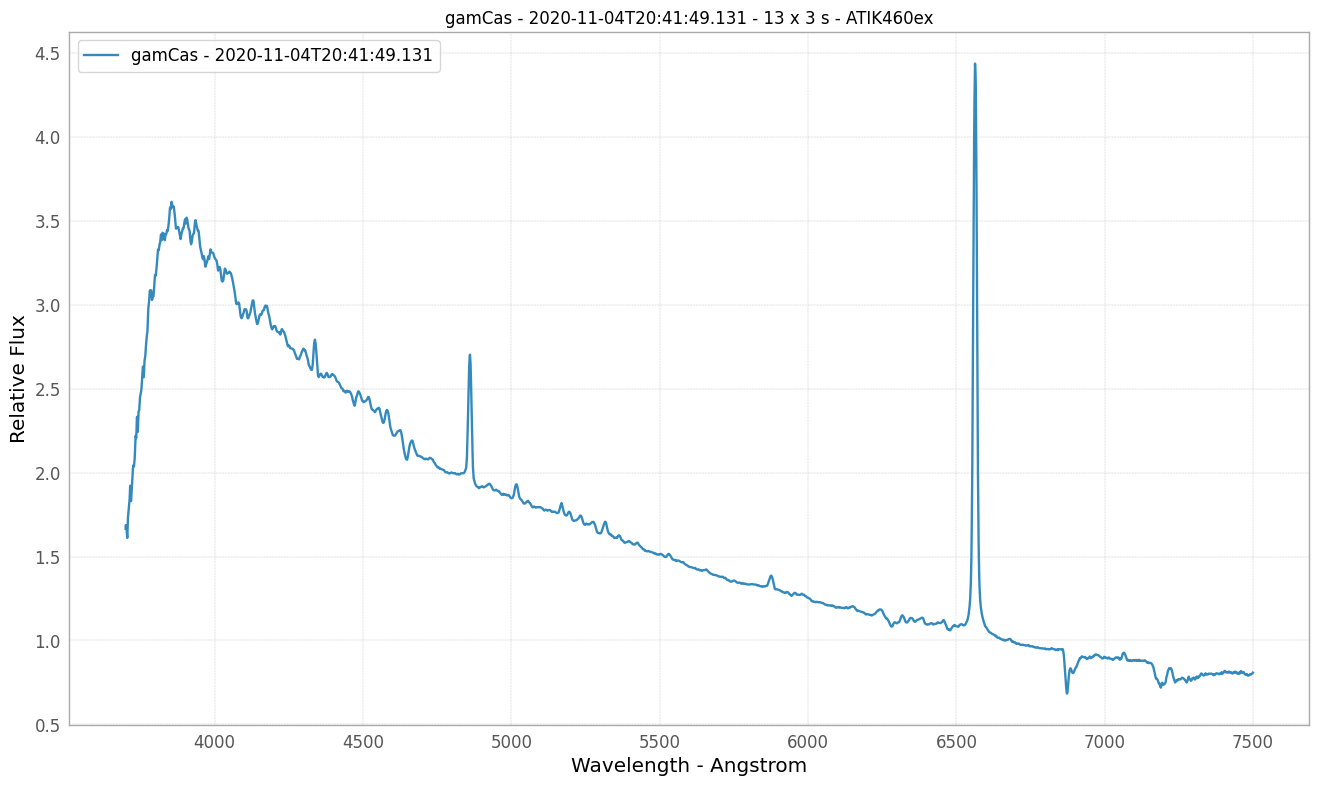

In [ ]:
#Show a unique spectrum 

#imports
from astropy import units as u #units
import astropy.wcs as fitswcs #wcs
from specutils import Spectrum1D, SpectralRegion #spectrum1D (specutils)

spec_path = "dataset/GamCas_20201104T204413.fit"

#open & load spectrum file
file = fits.open(spec_path)  
specdata = file[0].data
header = file[0].header

#make WCS object
wcs_data = fitswcs.WCS(header={'CDELT1': header['CDELT1'], 'CRVAL1': header['CRVAL1'],
                               'CUNIT1': header['CUNIT1'], 'CTYPE1': header['CTYPE1'],
                               'CRPIX1': header['CRPIX1']})

#set flux units
flux= specdata * u.Jy

#create a Spectrum1D object with specutils
spec = Spectrum1D(flux=flux, wcs=wcs_data)

#plot spectrum
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(spec.spectral_axis * u.AA, spec.flux)

#X axis label
ax.set_xlabel(header['CTYPE1'] + ' - ' + header['CUNIT1'])

#Y axis label
ax.set_ylabel('Relative Flux')

#Grid configuration
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
    
#legend configuraiton
legend_value = header['OBJNAME'] + ' - ' + header['DATE-OBS']
ax.legend([legend_value], loc=('best'))

#prepare and set plot title with header infos 
spectrumTitle = header['OBJNAME'] + ' - ' + header['DATE-OBS'] + ' - '+ header['EXPTIME2']+ ' - ' + str(header['DETNAM'])
ax.set_title(spectrumTitle, loc='center', fontsize=12, fontweight=0.5)

#Show Plot
plt.show()

#### 3.3 - Spectrum normalization by its continuum

<b>Continuum display</b>

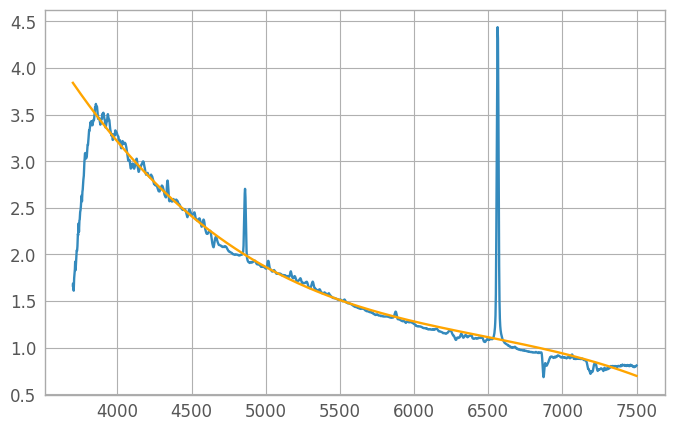

In [ ]:
#Visualize continuum fitting

#imports
from astropy.modeling import models, fitting
from specutils.fitting import fit_generic_continuum

#prepare data
x = spec.spectral_axis
y = spec.flux

#fitting continuum (with exclude region between 3700A and 4000A)
g1_fit = fit_generic_continuum(spec, exclude_regions=[SpectralRegion(3700 * u.AA, 4000 * u.AA)])
y_continuum_fitted = g1_fit(x)

#make plot
fig10, ax10 = plt.subplots(figsize=(8,5))
#spectrum
ax10.plot(x, y)
#continuum
ax10.plot(x, y_continuum_fitted, color="orange")
ax10.grid(True)
plt.show()

<b>Division by the continuum</b>

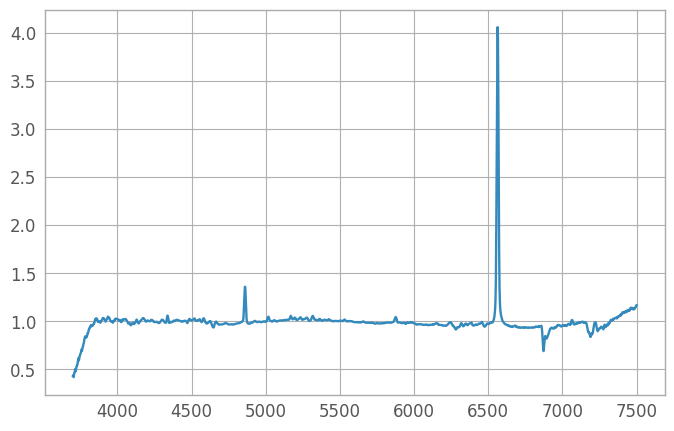

In [ ]:
#Normalization

#prepare data
x_2 = spec.spectral_axis
y_2 = spec.flux

#fitting continuum (with exclude region 3700/4000 & H lines emission)
g_fit = fit_generic_continuum(spec, exclude_regions=[SpectralRegion(3700 * u.AA, 4000 * u.AA), SpectralRegion(4825 * u.AA, 4885 * u.AA), SpectralRegion(6520 * u.AA, 6540 * u.AA)])

#divide spectrum by his continuum
y_cont_fitted = g_fit(x_2)
spec_normalized = spec / y_cont_fitted

#show on plot
fig11, ax11 = plt.subplots(figsize=(8,5))
ax11.plot(spec_normalized.spectral_axis, spec_normalized.flux)
ax11.grid(True)
plt.show()

#### 3.4  - Emission line detection

Once the spectrum has been normalised, it is possible to use the find_lines_derivative method to detect emission or absorption lines in the spectrum. There are two methods for this step, by calculating the derivative and then thresholding the flux (as below), or by thresholding the flux according to a factor applied to the spectral uncertainty. More information on these methods here : https://specutils.readthedocs.io/en/stable/fitting.html

In [ ]:
#imports
from specutils.fitting import find_lines_derivative
from specutils.fitting import fit_lines

#Line fitting with Derivative technique
lines = find_lines_derivative(spec_normalized, flux_threshold=1.2)
print('emission: ', lines[lines['line_type'] == 'emission']) 

emission:     line_center    line_type line_center_index
     Angstrom                                
----------------- --------- -----------------
4860.209249368181  emission              1893
 6562.77233958634  emission              4671


#### 3.5 - Selection of a spectral region and display of line analysis values

From the detection of lines in previous emissions, the selection of an associated spectral region allows to focus on one of them, Halpha for example, and to use existing analysis tools to retrieve the values (i.e. centroid, fhwm, snr, estimation of parameters of a Gaussian model, etc.). More information on these analysis tools here  : https://specutils.readthedocs.io/en/stable/fitting.html#parameter-estimation

center :  6562.926095953595 Angstrom
fwhm :  17.659703378282757 Angstrom


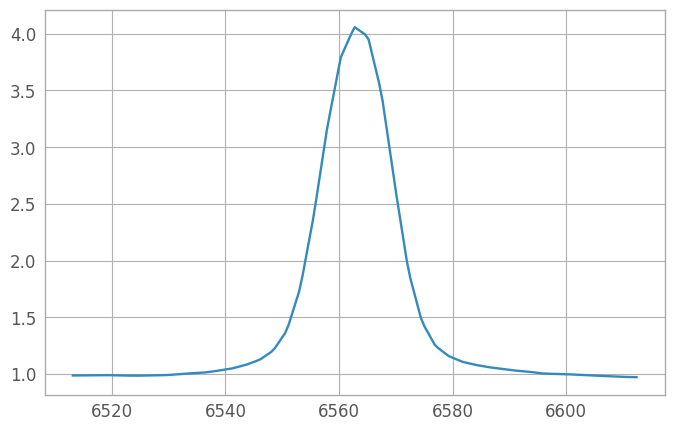

In [ ]:
#import analysis tools
from specutils.manipulation import extract_region
from specutils.fitting import estimate_line_parameters
from specutils.analysis import centroid, fwhm

#create spectral region (after line detection of 6562.77A) +/- 50A
sr =  SpectralRegion((6563-50)*u.AA, (6563+50)*u.AA)

#print centroid - need a spectrum and a spectral region in parameters
center = centroid(spec_normalized, sr)  
print("center : ", center)

#print fwhm - need a spectrum and a spectral region in parameters
fwhm_spec = fwhm(spec_normalized, regions=sr)
print("fwhm : ", fwhm_spec)

#create a new spectrum of the selected region for plot
sub_spectrum = extract_region(spec_normalized, sr)
Ha_line = Spectrum1D(flux=sub_spectrum.flux,spectral_axis=sub_spectrum.spectral_axis)

#plot
fig12, ax12 = plt.subplots(figsize=(8,5))
ax12.plot(Ha_line.spectral_axis, Ha_line.flux)
ax12.grid(True)
plt.show()

#### 3.6 - Multi-spectrum visualization

When several spectra are acquired over time on the same target, it is interesting to visualise them on the same graph to be able to compare them. Portions of previous codes can thus be reused. For the example below, I've double the two gam Cas spectra files made on the same night to make it more visible.

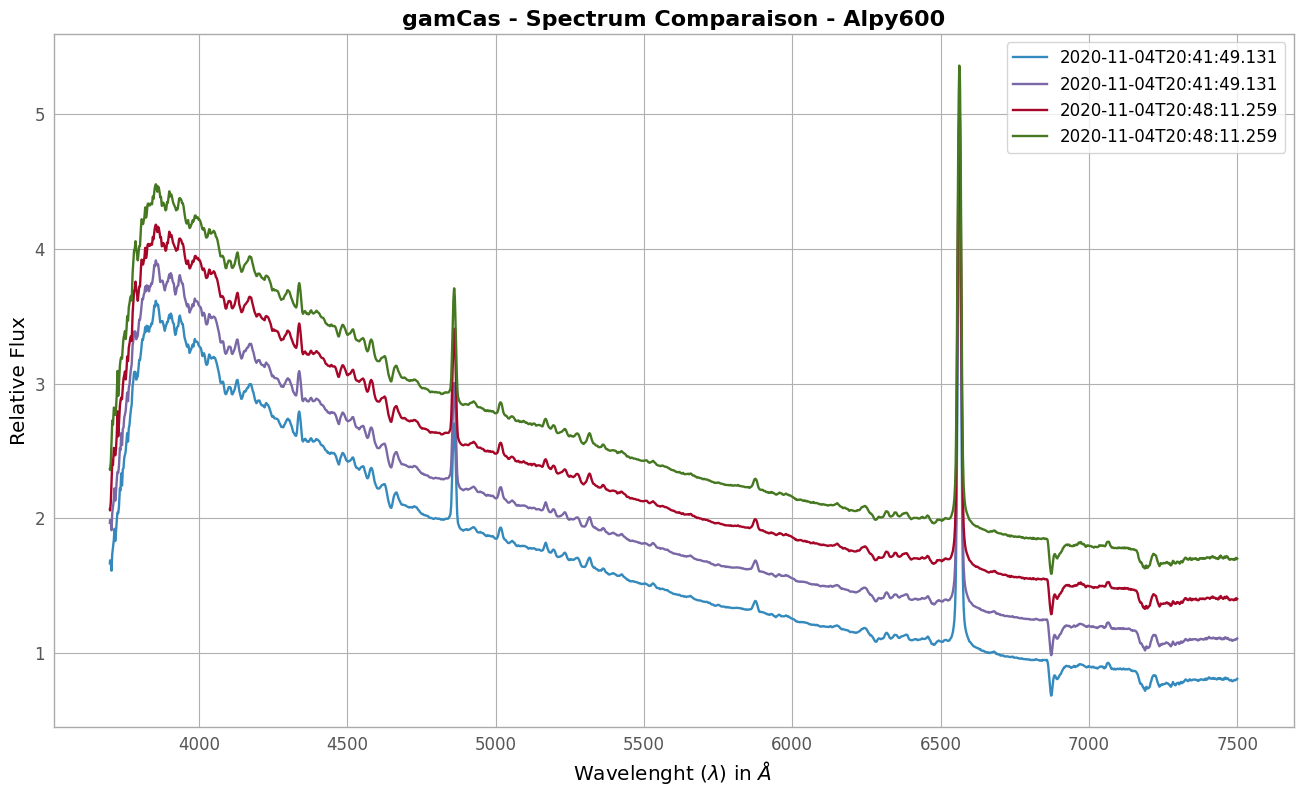

In [ ]:
#imports if needed
from astropy.io import fits
import astropy.units as u
import astropy.wcs as fitswcs
from specutils import Spectrum1D
import matplotlib.pyplot as plt

#list of path files
spec_list = ["dataset/GamCas_20201104T204413.fit",
            "dataset/GamCas_20201104T204413-2.fit",
            "dataset/GamCas_20201104T204937.fit",
            "dataset/GamCas_20201104T204937-2.fit"] 

#list of spectrum1D
spec1D_list = []

#modify offset for change visualization preferences
offset = 0.3

#parse and create plot for each spectrum in progress
for sip in spec_list :
    sip_file = fits.open(sip)
    sip_data = sip_file[0].data
    sip_header = sip_file[0].header

    #create WCS object for each spectrum in progress
    sip_wcs = fitswcs.WCS(header={'CDELT1': sip_header['CDELT1'], 'CRVAL1': sip_header['CRVAL1'],
                                   'CUNIT1': sip_header['CUNIT1'], 'CTYPE1': sip_header['CTYPE1'],
                                   'CRPIX1': sip_header['CRPIX1']})
    
    #apply offset on flux and create spec1D
    sip_flux = (sip_data + (offset * (spec_list.index(sip)))) * u.Jy
    sip_spec1D = Spectrum1D(flux=sip_flux, wcs=sip_wcs)
    
    #add spec1D to spec1DList
    spec1D_list.append((sip_spec1D, sip_header))
        
        
#create a fig
fig = plt.subplots(figsize=(16, 9))

#create a line plot for each spec1D in the list
for spec1Dip in spec1D_list:
    plt.plot(spec1Dip[0].spectral_axis, spec1Dip[0].flux, label=spec1Dip[1]["DATE-OBS"])
    
#Plot configuration 
plt.legend(loc='upper right')
plt.xlabel("Wavelenght ($\lambda$) in $\AA$ ")
plt.ylabel("Relative Flux")
plt.title("gamCas - Spectrum Comparaison - Alpy600", fontsize=16, fontweight='bold')
plt.show()

#### 4.4 - Additional libraries

The code for the implementation of the Bokeh library (see specBok) can be found at this address :

https://gitlab.com/chronosastro/aspyt
    
An example will be added in this notebook later.

------

This notebook is a remixed version of J. Newland's work as well as a tutorial from stellartrip.net.

---







##### Sources and further information (update in progress)

<sup>1</sup> http://www.astrosurf.com/buil/isis-software.html

<sup>2</sup> https://www.shelyak.com/logiciel-demetra/

<sup>3</sup> http://astrosurf.com/vdesnoux/

<sup>4</sup> https://jupyter.org/

<sup>5</sup> https://fr.wikipedia.org/wiki/Markdown

<sup>6</sup> https://en.wikipedia.org/wiki/Astropy

<sup>7</sup> https://www.astropy.org/

<sup>8</sup> http://simbad.u-strasbg.fr/simbad/

<sup>9</sup> https://learn.astropy.org/FITS-images.html

<sup>10</sup> https://matplotlib.org/

<sup>11</sup> https://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials

<sup>12</sup> https://www.siril.org/

<sup>13</sup> https://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html

<sup>14</sup> http://spcaudace.free.fr/

<sup>15</sup> https://specutils.readthedocs.io/en/stable/index.html